# 앙상블(Ensemble) - 1. 보팅, 배깅, 랜덤포레스트

# 보팅( Voting Classifier)

### 개별 분류기의 성능과 보팅 분류기의 성능 비교

### 하드보팅 모델 학습 및 예측

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# 위스콘식 유방암 데이터세트
from sklearn.datasets import load_breast_cancer

b_cancer = load_breast_cancer()

b_cancer.data.shape

(569, 30)

In [ ]:
# 데이터 살펴보기

In [4]:
# 데이터 준비
X = b_cancer.data
y = b_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

* 로지스틱 회귀, KNN을 기반으로 한 소프트보팅 분류기

In [5]:
# 개별 분류기 모델 생성하기

# 로지스틱 회귀
lr_clf = LogisticRegression(max_iter=10000)
# KNN
knn_clf = KNeighborsClassifier(n_neighbors=8)
# 결정트리
dt_clf = DecisionTreeClassifier(max_depth=3)

# 앙상블 모델
vo_clf = VotingClassifier(estimators= [('LR', lr_clf), ('KNN', knn_clf), ('DT', dt_clf)], voting='soft')

# 모델 학습
vo_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=10000)),
                             ('KNN', KNeighborsClassifier(n_neighbors=8)),
                             ('DT', DecisionTreeClassifier(max_depth=3))],
                 voting='soft')

In [6]:
y_pred_test = vo_clf.predict(X_test)
test_score = accuracy_score(y_test, y_pred_test)
print(f'voting test score: {test_score}')

voting test score: 0.9473684210526315


# Random Forest : 와인 데이터셋

하이퍼 파라미터
n_estimators: 모형(week learner)의 개수, 순차적으로 오류를 보정해 수가 많으면 성능이 일정 수준까지 높아질 수 있으나, 수행 시간이 오래 걸린다는 단점이 있음(디폴트는 100)
min_samples_leaf: 말단 리프 노드의 최소한의 샘플 데이터 수, 디폴트 1
max_depth: 트리의 최대 깊이, 디폴트 3
max_features: 디폴트는 auto, If “auto”, then max_features=sqrt(n_features) 즉, 피처가 4개면 분할을 위해 2개 참조 


In [7]:
wine_kaggle = pd.read_csv('./data/wine_dataset.csv')
wine = wine_kaggle[['alcohol', 'residual_sugar', 'pH']]
wine_kaggle['style'].replace('red', 0, inplace=True)
wine_kaggle['style'].replace('white', 1, inplace=True)
wine_kaggle.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [8]:
X = wine.values
y = wine_kaggle['style'].values

In [9]:
# 데이터 분할 :test_size=0.2, random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# RandomForestClassifier 모델 구축, 학습 및 평가

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [11]:
print(f'train score: {rf_clf.score(X_train, y_train)}')
print(f'test score: {rf_clf.score(X_test, y_test)}')

train score: 0.996921300750433
test score: 0.8892307692307693


In [12]:
y_pred = rf_clf.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[266,  75],
       [ 69, 890]], dtype=int64)

In [14]:
# 분류 평가 리포트 - Classfication report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.78      0.79       341
           1       0.92      0.93      0.93       959

    accuracy                           0.89      1300
   macro avg       0.86      0.85      0.86      1300
weighted avg       0.89      0.89      0.89      1300



In [ ]:
# [실습] 위스콘신 데이터셋을 활용하여 randomforest model을 만들고 voting model의 성능과 비교

### 랜덤 포레스트 하이퍼파라미터 튜닝

In [15]:
# 과대적합이므로 그리드서치
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 500], 'max_depth': [6, 8, 10, 12], 'min_samples_split': [8, 16, 20], 'min_samples_leaf': [8, 12, 18]}

gs = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100, 500]})

In [16]:
gs.best_params_

{'max_depth': 12,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 500}

In [17]:
print(f'train_score: {gs.best_estimator_.score(X_train, y_train)}')
print(f'test_score: {gs.best_estimator_.score(X_test, y_test)}')

train_score: 0.9074466038098903
test_score: 0.8692307692307693


* [참고] 트리 갯수 300개로 증가시킨후 학습 -> 별도의 테스트 데이터셋에서 예측 -> 성능측정

### 특성 중요도(feature importances)

In [18]:
fi = gs.best_estimator_.feature_importances_

In [19]:
f_importance = pd.Series(data=fi, index=wine.columns)

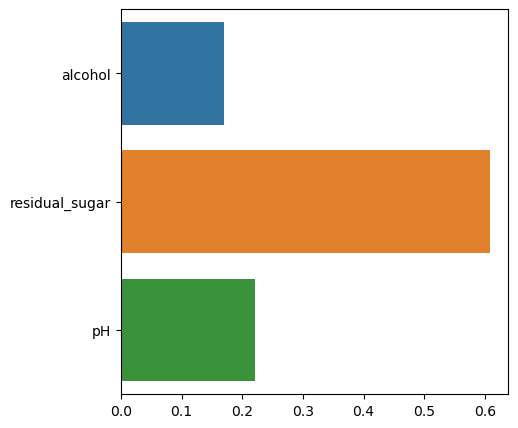

In [20]:
plt.figure(figsize=(5,5))
sns.barplot(x=f_importance, y=wine.columns);

# [실습] 타이타닉 데이터셋 랜덤 포레스트 분류
기본 모델 - 하이퍼파라미터 튜닝 - 특성 중요도 시각화

In [22]:
titanic = pd.read_csv('./data/df_titanic.csv')
titanic

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_1
0,0,22.0,1,0,1.981001,0,1,1
1,1,38.0,1,0,4.266662,0,0,0
2,1,26.0,0,0,2.070022,0,1,0
3,1,35.0,1,0,3.972177,0,0,0
4,0,35.0,0,0,2.085672,0,1,1
...,...,...,...,...,...,...,...,...
1038,1,3.0,1,1,2.622855,0,1,0
1039,1,37.0,1,0,4.499810,0,0,0
1040,1,28.0,0,0,2.050913,0,1,0
1041,1,39.0,0,0,4.690430,0,0,0


In [23]:
X = titanic.drop('Survived', axis=1)
Y = titanic['Survived']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [27]:
# 과적합 파티
print(f'train score: {rf_clf.score(X_train, y_train)}')
print(f'test score: {rf_clf.score(X_test, y_test)}')

train score: 0.9892086330935251
test score: 0.8564593301435407


In [29]:
# 그래도 계속해본다

y_pred = rf_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[111  11]
 [ 19  68]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       122
           1       0.86      0.78      0.82        87

    accuracy                           0.86       209
   macro avg       0.86      0.85      0.85       209
weighted avg       0.86      0.86      0.86       209



### 하이퍼 파라미터

In [30]:
# GridSearchCV()를 활용한 최적의 파라미터 찾기

params = {'n_estimators': [100, 500], 'max_depth': [3, 6, 8, 10], 'min_samples_split': [8, 16, 20], 'min_samples_leaf': [4, 8, 12]}

gs = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6, 8, 10],
                         'min_samples_leaf': [4, 8, 12],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100, 500]})

In [31]:
gs.best_params_

{'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [32]:
print(f'train_score: {gs.best_estimator_.score(X_train, y_train)}')
print(f'test_score: {gs.best_estimator_.score(X_test, y_test)}')

train_score: 0.8645083932853717
test_score: 0.8899521531100478


### 특성 중요도

In [33]:
fi = gs.best_estimator_.feature_importances_

In [35]:
f_importance = pd.Series(data=fi, index=X.columns)

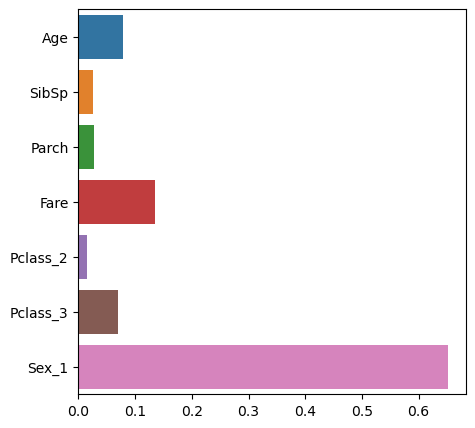

In [36]:
plt.figure(figsize=(5,5))
sns.barplot(x=f_importance, y=X.columns);